<a href="https://colab.research.google.com/github/letisalbal/Final-Project/blob/master/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

%matplotlib inline

In [2]:
#Import the CSV File
from google.colab import files 
uploaded = files.upload() 

Saving heart.csv to heart (2).csv


In [3]:
#Read and Display CSV File
import io
data = io.BytesIO(uploaded['heart.csv'])

heart_df = pd.read_csv(data)
heart_df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#Rename the Columns
heart_df2 = (heart_df.rename(columns={"age": "Age", 
                                      "sex": "Gender", 
                                      "cp": "ChestPain", 
                                      "trestbps": "RestingBloodPressure", 
                                      "chol": "Cholesterol", 
                                      "fbs": "FastingBloodSugar", 
                                      "restecg": "RestingECG", 
                                      "thalach": "MaxHeartrate", 
                                      "exang":"ExerciseIndusedAngina",
                                      "oldpeak": "OldPeak",
                                      "slope": "Slope",
                                      "ca": "MajorVessels",
                                      "thal": "Thalassemia",
                                      "target": "Target"}))

heart_df2.head()

,Age,Gender,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartrate,ExerciseIndusedAngina,OldPeak,Slope,MajorVessels,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [0]:
#Replace Values in Gender Column
#heart_df2['Gender'].replace([0,1], ['Female', 'Male'], inplace=True)
#heart_df2.head()


In [0]:
#Replace Values in Chest Pain Column
#heart_df2['ChestPain'].replace([0,1,2,3], ['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic'], inplace=True)
#heart_df2.head()

In [0]:
#Replace Values in Fasting Blood Sugar Column
#heart_df2['FastingBloodSugar'].replace([0,1], ['False', 'True'], inplace=True)
#heart_df2.head()

In [0]:
#Replace Values in Exercise Indused Angina Column
#heart_df2['ExerciseIndusedAngina'].replace([0,1], ['No', 'Yes'], inplace=True)
#heart_df2.head()

In [0]:
#Replace Values in Slope Column
#heart_df2['Slope'].replace([0,1,2], ['unsloping', 'flat', 'downsloping'], inplace=True)
#heart_df2.head()

In [0]:
#Replace Values in Thalassemia Column
#heart_df2['Thalassemia'].replace([0,1,2,3], ['N/A','Normal', 'Fixed_Defect', 'Reversable_Defect'], inplace=True)
#heart_df2.head()

In [0]:
#Replace Values in Target Column
#heart_df2['Target'].replace([1,0], ['Heart Problem', 'No Heart Problem'], inplace=True)
#heart_df2.head()

In [11]:
#Print Entire Dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
heart_df2.head()

,Age,Gender,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartrate,ExerciseIndusedAngina,OldPeak,Slope,MajorVessels,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
# Description
heart_df2.describe()

,Age,Gender,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartrate,ExerciseIndusedAngina,OldPeak,Slope,MajorVessels,Thalassemia,Target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
heart_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
Age                      1025 non-null int64
Gender                   1025 non-null int64
ChestPain                1025 non-null int64
RestingBloodPressure     1025 non-null int64
Cholesterol              1025 non-null int64
FastingBloodSugar        1025 non-null int64
RestingECG               1025 non-null int64
MaxHeartrate             1025 non-null int64
ExerciseIndusedAngina    1025 non-null int64
OldPeak                  1025 non-null float64
Slope                    1025 non-null int64
MajorVessels             1025 non-null int64
Thalassemia              1025 non-null int64
Target                   1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Analysing the "Target" variable**

In [14]:
heart_df2["Target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Target, dtype: float64

In [15]:
heart_df2["Target"].unique()

array([0, 1])

**Check the Correlation between Columns**

In [16]:
print(heart_df2.corr())

                            Age    Gender  ChestPain  RestingBloodPressure  \
Age                    1.000000 -0.103240  -0.071966              0.271121   
Gender                -0.103240  1.000000  -0.041119             -0.078974   
ChestPain             -0.071966 -0.041119   1.000000              0.038177   
RestingBloodPressure   0.271121 -0.078974   0.038177              1.000000   
Cholesterol            0.219823 -0.198258  -0.081641              0.127977   
FastingBloodSugar      0.121243  0.027200   0.079294              0.181767   
RestingECG            -0.132696 -0.055117   0.043581             -0.123794   
MaxHeartrate          -0.390227 -0.049365   0.306839             -0.039264   
ExerciseIndusedAngina  0.088163  0.139157  -0.401513              0.061197   
OldPeak                0.208137  0.084687  -0.174733              0.187434   
Slope                 -0.169105 -0.026666   0.131633             -0.120445   
MajorVessels           0.271551  0.111729  -0.176206            

**Exploring Data Analysis (EDA)**

Text(0.5, 1.0, 'Target in relation to Heart Disease')

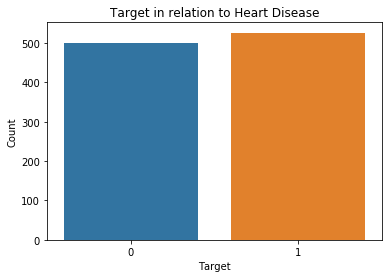

In [17]:
# Exploring Data Analysis

# Analyzing the target variable:

y = heart_df2["Target"]
sns.countplot(y)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target in relation to Heart Disease')

In [18]:
target_temp = heart_df2.Target.value_counts()
print(target_temp)

1    526
0    499
Name: Target, dtype: int64


In [19]:
print("Percentage of Patients without Heart Problems: "+str(round(target_temp[0]*100/1025,2)))

print("Percentage of Patients with Heart Problems: "+str(round(target_temp[1]*100/1025,2)))

Percentage of Patients without Heart Problems: 48.68
Percentage of Patients with Heart Problems: 51.32


Text(0.5, 1.0, 'Age related to Heart Disease')

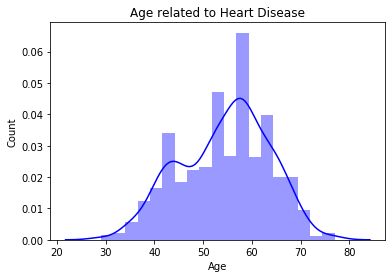

In [20]:
sns.distplot(heart_df2['Age'], color = "blue")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age related to Heart Disease')

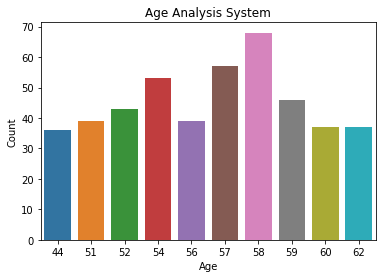

In [21]:
sns.barplot(x=heart_df2['Age'].value_counts()[:10].index,y=heart_df2['Age'].value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Analysis System')
plt.show()

In [22]:
heart_df2["Gender"].unique()

array([1, 0])

In [23]:
countFemale = len(heart_df2[heart_df2['Gender'] == 0])
countMale = len(heart_df2[heart_df2['Gender'] == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(heart_df2['Gender']))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(heart_df2['Gender']))*100)))

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


Text(0.5, 1.0, 'Heart Diesease and Gender')

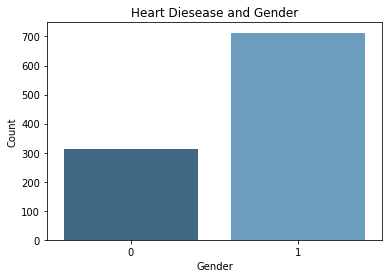

In [24]:
# Analyzing the "Heart Disease Data" feature:
sns.countplot(data=heart_df2, x = 'Gender', palette="Blues_d")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Heart Diesease and Gender')

Text(0, 0.5, 'Frequency')

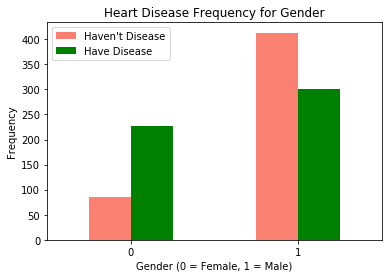

In [25]:
pd.crosstab(heart_df2["Gender"],heart_df2["Target"]).plot(kind="bar",color=['salmon','green'])
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')

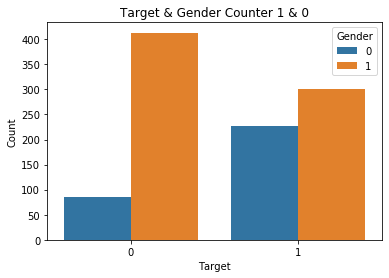

In [26]:
sns.countplot(heart_df2['Target'],hue=heart_df2['Gender'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target & Gender Counter 1 & 0')
plt.show()

In [27]:
#Analyzing chest pain type
heart_df2["ChestPain"].unique()

array([0, 1, 2, 3])

Text(0.5, 1.0, 'Chest Pain Type')

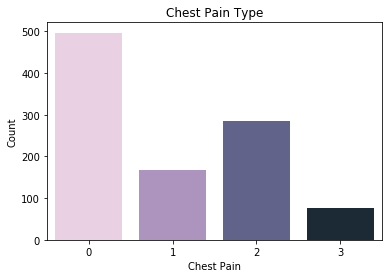

In [28]:
sns.countplot(data=heart_df2, x = 'ChestPain', palette="ch:2.5")
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.title('Chest Pain Type')

Text(0.5, 1.0, 'Chest Pain Type')

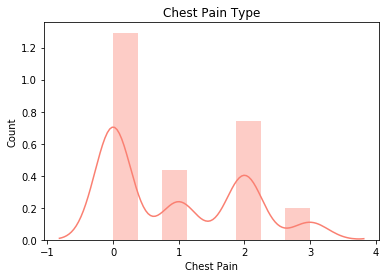

In [29]:
sns.distplot(heart_df2['ChestPain'], color = "salmon")
plt.xlabel('Chest Pain')
plt.ylabel('Count')
plt.title('Chest Pain Type')

List of Age Group with Critical Chest Pain : [51, 58, 56, 59, 52, 60, 61, 34, 40, 64, 69, 42, 38, 63, 45, 65, 66]


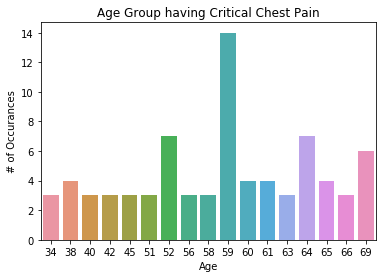

In [30]:
# Age Group of Suffering from Critical Chest Pain who need Urgent Treatment

age_critical_cp=[]

# index no. of people with critical chest pain

index_critical_cp=[]  

for i in range(len(heart_df2)-1):
    if heart_df2.ChestPain[i] == 3:
        index_critical_cp.append(i)
        age_critical_cp.append(heart_df2.Age[i])
sns.countplot(age_critical_cp)
plt.xlabel('Age')
plt.ylabel('# of Occurances')
plt.title('Age Group having Critical Chest Pain')
print('List of Age Group with Critical Chest Pain :' ,list(Counter(age_critical_cp)))


In [31]:
#Analyze FBS feature
heart_df2["FastingBloodSugar"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: FastingBloodSugar, dtype: float64

In [32]:
heart_df2["FastingBloodSugar"].unique()

array([0, 1])

Text(0.5, 1.0, 'Fasting Blood Sugar in Realtion to Heart Disease')

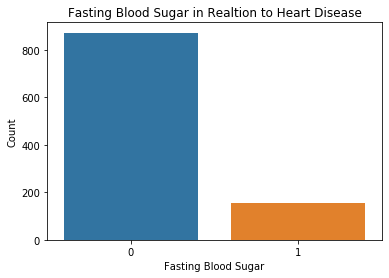

In [33]:
sns.countplot(data=heart_df2, x = 'FastingBloodSugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title('Fasting Blood Sugar in Realtion to Heart Disease')

Text(0, 0.5, 'Frequency of Disease or Not')

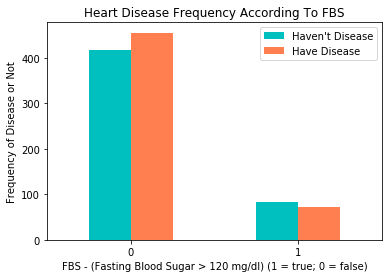

In [34]:
pd.crosstab(heart_df2["FastingBloodSugar"],heart_df2["Target"]).plot(kind="bar",color=['c','coral' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')


In [35]:
#restecg feature
heart_df2["RestingECG"].unique()


array([1, 0, 2])

Text(0.5, 1.0, 'Relation between Resting ECG and Target')

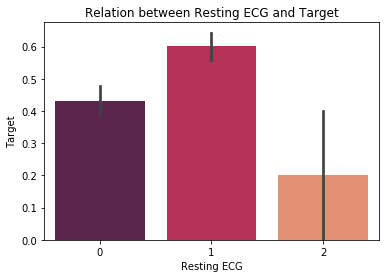

In [36]:
sns.barplot(heart_df2["RestingECG"],y, palette="rocket")
plt.xlabel('Resting ECG')
plt.ylabel('Target')
plt.title('Relation between Resting ECG and Target')

In [37]:
#exang feature
heart_df2["ExerciseIndusedAngina"].unique()

array([0, 1])

Text(0.5, 1.0, 'Exercise Indused Angina in relation to Heart Disease')

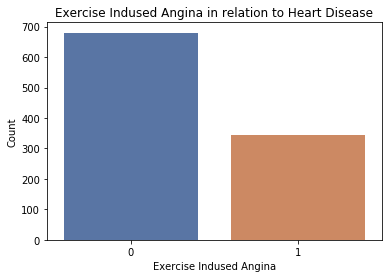

In [38]:
sns.countplot(data=heart_df2, x = 'ExerciseIndusedAngina', palette="deep")
plt.xlabel('Exercise Indused Angina')
plt.ylabel('Count')
plt.title('Exercise Indused Angina in relation to Heart Disease')

In [39]:
#slope feature
heart_df2["Slope"].unique()

array([2, 0, 1])

Text(0.5, 1.0, 'Heart Rate Slope in relation to Heart Disease')

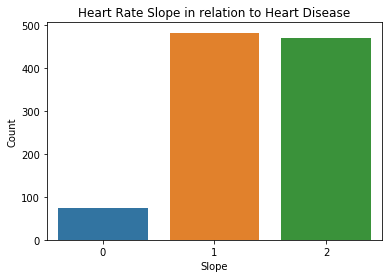

In [40]:
sns.countplot(data=heart_df2, x = 'Slope')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.title('Heart Rate Slope in relation to Heart Disease')

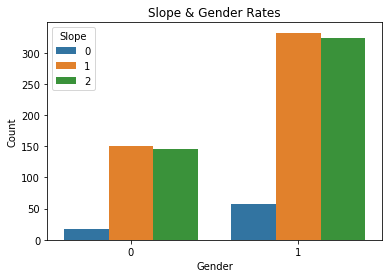

In [41]:
sns.countplot(heart_df2['Gender'],hue=heart_df2['Slope'])
plt.title('Slope & Gender Rates')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [42]:
#Major Vessels Feature
heart_df2["MajorVessels"].unique()

array([2, 0, 1, 3, 4])

Text(0.5, 1.0, 'Major Vessels and Heart Disease')

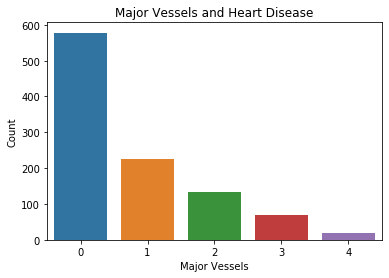

In [43]:
sns.countplot(heart_df2["MajorVessels"])
plt.xlabel('Major Vessels')
plt.ylabel('Count')
plt.title('Major Vessels and Heart Disease')

Text(0.5, 1.0, 'Major Vessels and Heart Disease')

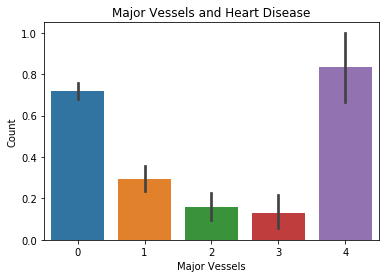

In [44]:
sns.barplot(heart_df2["MajorVessels"],y)
plt.xlabel('Major Vessels')
plt.ylabel('Count')
plt.title('Major Vessels and Heart Disease')

In [45]:
#thal feature
heart_df2["Thalassemia"].unique()

array([3, 2, 1, 0])

Text(0.5, 1.0, 'Thalassemia in relation to Heart Disease')

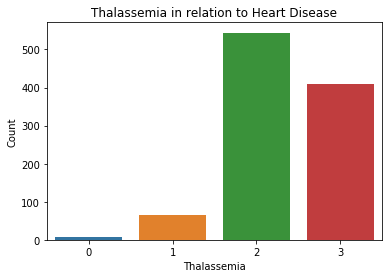

In [46]:
sns.countplot(data=heart_df2, x = 'Thalassemia')
plt.xlabel('Thalassemia')
plt.ylabel('Count')
plt.title('Thalassemia in relation to Heart Disease')

Text(0.5, 1.0, 'Thalassemia and Heart Disease')

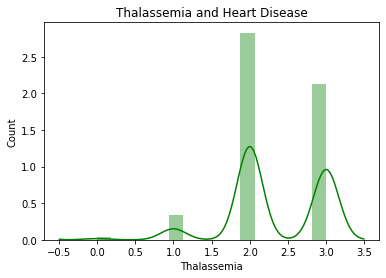

In [47]:
sns.distplot(heart_df2['Thalassemia'], color = "green")
plt.xlabel('Thalassemia')
plt.ylabel('Count')
plt.title('Thalassemia and Heart Disease')

Text(0.5, 1.0, 'Blood Pressure vs Cholesterol')

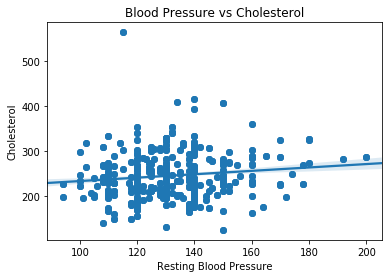

In [48]:
sns.regplot(x=heart_df2.RestingBloodPressure,y=heart_df2.Cholesterol)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.title('Blood Pressure vs Cholesterol')

**Train Test Split**

In [0]:
from sklearn.model_selection import train_test_split

predictors = heart_df2.drop("Target", axis=1)
target = heart_df2["Target"]

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)


In [50]:
X_train.shape

(820, 13)

In [51]:
X_test.shape

(205, 13)

In [52]:
Y_train.shape

(820,)

In [53]:
Y_test.shape

(205,)

**Model Fitting**

In [0]:
# Model Fitting

from sklearn.metrics import accuracy_score

**Logistic Regression**

In [56]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, Y_train)

Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
Y_pred_lr.shape

(205,)

In [58]:
score_lr = round(accuracy_score(Y_pred_lr, Y_test)*100,2)

print("The accuracy score acheived using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score acheived using Logistic Regression is: 86.34 %


**SVM**

In [0]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [60]:
Y_pred_svm.shape

(205,)

In [61]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


**K Nearest Neighbors**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [65]:
Y_pred_knn.shape

(205,)

In [66]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


**Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [68]:
print(Y_pred_dt.shape)

(205,)


In [69]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")


The accuracy score achieved using Decision Tree is: 100.0 %


**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)


In [71]:
Y_pred_rf.shape

(205,)

In [72]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")


The accuracy score achieved using Decision Tree is: 100.0 %


**Final Scores**

In [73]:
scores = [score_lr,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %


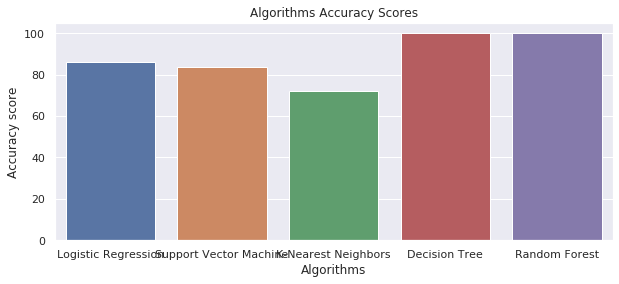

In [77]:
sns.set(rc={'figure.figsize':(10,4)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title('Algorithms Accuracy Scores')

sns.barplot(algorithms,scores)